In [1]:
import matplotlib.pyplot as plt
import math

plt.rcParams["figure.dpi"] = 600

In [2]:
def read3_avg(filename):
    sortList = ["IPS4o"]
    latencyList = ['Sorting latency', 'Reading latency']
    total = []
    for latency in latencyList:
        for sort in sortList:
            res = []
            next = False
            f = open(filename)
            line = f.readline()
            while line: 
                if sort in line:
                    next = True
                elif latency in line and next:
                    line = line.strip(latency + ": ")
                    line = line.strip(" (ms)\n")
                    res.append(float(line))
                    next = False
                line = f.readline() 
            f.close()
            res = list(map(lambda x: round(x/1000, 3), res))
        n = []
        for i in range(0, len(res), 10):
            n.append(round(sum(res[i+3:i+7])/4, 3))     # ignore the first two and lst two, get the avg of middle values
        total.append(n)
    return total


def read3(filename):
    sortList = ["IPS4o"]
    latencyList = ['Sorting latency', 'Reading latency']
    total = []
    for latency in latencyList:
        for sort in sortList:
            res = []
            next = False
            f = open(filename)
            line = f.readline()
            while line: 
                if sort in line:
                    next = True
                elif latency in line and next:
                    line = line.strip(latency + ": ")
                    line = line.strip(" (ms)\n")
                    res.append(float(line))
                    next = False
                line = f.readline() 
            f.close()
            res = list(map(lambda x: round(x/1000, 3), res))
        total.append(res)
    return total


def read3_stats(filename):
    out = []
    total = []
    [l1, l2] = read3(filename)
    for k in range(len(l1)):
        total.append(round(l1[k] + l2[k], 3))
    for k in range(0, len(total), 10):
        avgV = round(sum(total[k+3:k+7])/4, 3)
        minV = round(min(total[k+3:k+7]), 3)
        maxV = round(max(total[k+3:k+7]), 3)
        out.append([(avgV, minV, maxV)])
    return out

In [3]:
def run(filename):
    sort = []
    for idx in range(0, len(filename)):
        out = read3_avg(filename[idx])
        if not out[1]:
            sort.append(out[0][0])
        else:
            sort.append(out[0][0] + out[1][0])

    sort = list(map(lambda x: round(x, 1), sort))

    xname = ['IPS\u2074o\n(in-place)', 'IPS\u2074o\n(only-BAS)', 'IPS\u2074o\n(hybrid)']
    x = list(range(len(xname)))

    width = 0.5

    plt.figure(figsize=(2.4, 1.6))
    plt.bar(x, sort, width=width, edgecolor='#4584C3', color='white', linewidth=1.5)
    

    plt.xticks(x, xname, size=7)
    # plt.yticks([])
    plt.yticks(range(0,101,20), size=7)
    plt.xlim(-0.5, 2.5, 1)
    plt.ylim(0, 100)
    plt.ylabel('Latency (s)', size=7)
    plt.grid(linestyle='--', axis='y', alpha=0.3)
    plt.tight_layout()

    for x, y in zip(x, sort):
        plt.text(x-0.194, y-13, y, color='black', size=7)    # weight='bold'

    plt.tight_layout()
    plt.savefig('fig/ips4o.pdf', format='pdf')

    plt.show()

In [4]:
folder = '20231025_ips4o'
datasize = '400m'
datatype = 'uniform'
date = '20231025'
file = ['ips4o_inPlace', 'ips4o_onlyBAS', 'ips4o_hybrid']

/tmp/ipykernel_3450206/1997464153.py:24: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-0.5, 2.5, 1)
/tmp/ipykernel_3450206/1997464153.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


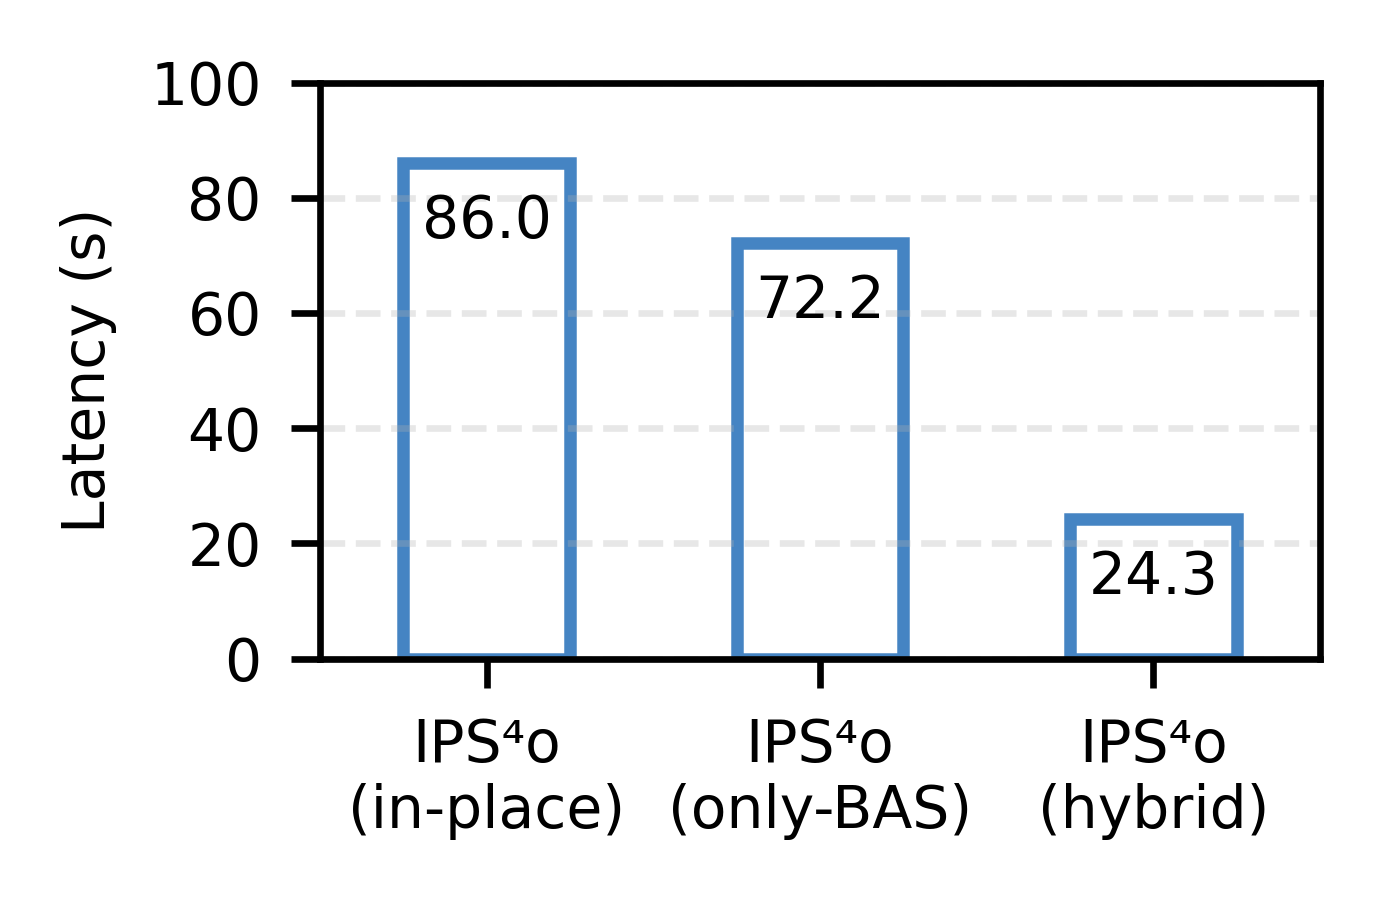

In [5]:
filename = [folder+"/"+datasize+"_"+file[k]+"_"+datatype+"_"+date+".out" for k in range(len(file))]
run(filename)